<a href="https://colab.research.google.com/github/furkanoruc/final-project-GSU/blob/main/Met_Classification_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#torch

from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import time
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

#libs
import numpy as np 
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from PIL import Image
Image.MAX_IMAGE_PIXELS = None


PyTorch Version:  1.12.1+cu113
Torchvision Version:  0.13.1+cu113


In [ ]:
#Yes - All
!wget -O data1.zip https://www.dropbox.com/sh/neoa6gp229lsyze/AACYeCrQRGulJUqbqmoIlxKDa?dl=0


--2022-12-02 04:18:59--  https://www.dropbox.com/sh/neoa6gp229lsyze/AACYeCrQRGulJUqbqmoIlxKDa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/neoa6gp229lsyze/AACYeCrQRGulJUqbqmoIlxKDa [following]
--2022-12-02 04:18:59--  https://www.dropbox.com/sh/raw/neoa6gp229lsyze/AACYeCrQRGulJUqbqmoIlxKDa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5083a9c41f50c6cef64a23a276.dl.dropboxusercontent.com/zip_download_get/BVOhJnb74EtgHt5afB7Uk1Ev94V7fvMbRwLAgsfiLPmD0xJCpba7Y8cYpNgkzYvAeI-HC6rTyRy9epI17HLLSobMdnT2LTafpjPulhfDZxzyhg# [following]
--2022-12-02 04:19:00--  https://uc5083a9c41f50c6cef64a23a276.dl.dropboxusercontent.com/zip_download_get/BVOhJnb74EtgHt5afB7Uk1Ev94V7fvMbRwLAgsfiLPmD0xJCpba7Y8cYpNgkzYvAeI-HC6rTyRy9epI17HLLSobMdnT2

In [ ]:
!unzip data1.zip -x / -d data/Yes-All

Archive:  data1.zip
 extracting: data/Yes-All/SUS13___2021_07_15_18.45.27  
 extracting: data/Yes-All/SUS35___2021_06_17_12.01.28  
 extracting: data/Yes-All/SUS52___2021_07_15_22.02.37  
 extracting: data/Yes-All/SUS62___2021_07_15_23.08.59  
 extracting: data/Yes-All/SUS64___2021_07_15_23.32.13  
 extracting: data/Yes-All/SUS99___2021_07_16_02.31.18  
 extracting: data/Yes-All/SUS19___2021_07_15_19.33.44  
 extracting: data/Yes-All/SUS25___2021_07_15_20.19.20  
 extracting: data/Yes-All/SUS43___2021_07_15_21.16.08  
 extracting: data/Yes-All/SUS54___2021_07_15_22.19.37  
 extracting: data/Yes-All/SUS68___2021_07_15_23.59.25  
 extracting: data/Yes-All/SUS70___2021_07_16_00.07.57  
 extracting: data/Yes-All/SUS74___2021_07_16_00.44.36  
 extracting: data/Yes-All/SUS79___2021_07_16_01.14.39  
 extracting: data/Yes-All/SUS92___2021_07_16_01.52.18  
 extracting: data/Yes-All/SUS57 - 2021-07-15 22.38.45  
 extracting: data/Yes-All/SUS108___2021_07_16_03.00.38  
 extracting: data/Yes-All/S

In [ ]:
#No - Met
!wget -O data2.zip https://www.dropbox.com/sh/9roj2avzwmw7tmm/AAAC5SkTW9oZtdUEUbk7_iPHa?dl=0


--2022-12-02 04:20:12--  https://www.dropbox.com/sh/9roj2avzwmw7tmm/AAAC5SkTW9oZtdUEUbk7_iPHa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/9roj2avzwmw7tmm/AAAC5SkTW9oZtdUEUbk7_iPHa [following]
--2022-12-02 04:20:12--  https://www.dropbox.com/sh/raw/9roj2avzwmw7tmm/AAAC5SkTW9oZtdUEUbk7_iPHa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5b35c0b082d21eafbe627f7cd4.dl.dropboxusercontent.com/zip_download_get/BVP3Ia9xDPQt8TfP-sT1_J0MnKMoUe1KLAqMZM800ySyg2jsvOLHIM5XqAcvhbxkvPTmvBT3lcBvy_Z6xJbyJF4z4bVZj1fWSHa6PxaH7RKzHQ# [following]
--2022-12-02 04:20:13--  https://uc5b35c0b082d21eafbe627f7cd4.dl.dropboxusercontent.com/zip_download_get/BVP3Ia9xDPQt8TfP-sT1_J0MnKMoUe1KLAqMZM800ySyg2jsvOLHIM5XqAcvhbxkvPTmvBT3lcBvy_Z6xJbyJF4z4bVZ

In [ ]:
!unzip data2.zip -x / -d data/No-Met-All

Archive:  data2.zip
 extracting: data/No-Met-All/SUS20___2021_07_15_19.46.27  
 extracting: data/No-Met-All/SUS23___2021_07_15_19.54.29  
 extracting: data/No-Met-All/SUS24___2021_07_15_20.10.33  
 extracting: data/No-Met-All/SUS48___2021_07_15_21.41.06  
 extracting: data/No-Met-All/SUS51___2021_07_15_21.52.24  
 extracting: data/No-Met-All/SUS65___2021_06_17_12.12.01  
 extracting: data/No-Met-All/SUS66___2021_07_15_23.40.57  
 extracting: data/No-Met-All/SUS67___2021_07_15_23.51.11  
 extracting: data/No-Met-All/SUS53___2021_07_15_22.15.00  
 extracting: data/No-Met-All/SUS56___2021_07_15_22.25.32  
 extracting: data/No-Met-All/SUS11___2021_07_15_18.26.59  
 extracting: data/No-Met-All/SUS15___2021_07_15_18.58.21  
 extracting: data/No-Met-All/SUS16___2021_07_15_19.06.32  
 extracting: data/No-Met-All/SUS17___2021_07_15_19.14.11  
 extracting: data/No-Met-All/SUS18___2021_07_15_19.22.45  
 extracting: data/No-Met-All/SUS26___2021_07_15_20.24.21  
 extracting: data/No-Met-All/SUS27__

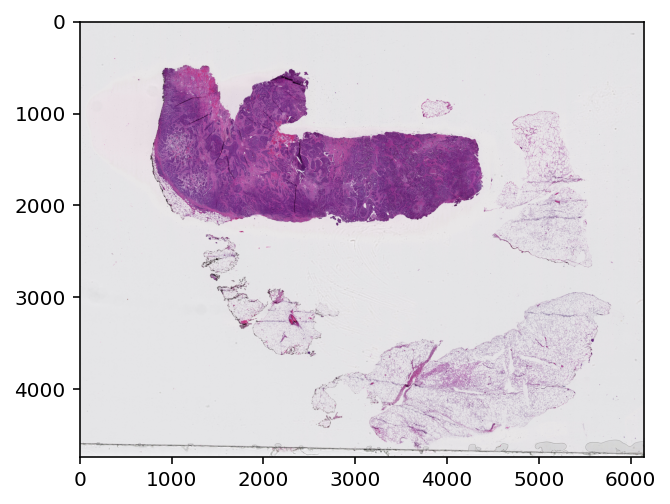

In [ ]:
img = plt.imread('data/Yes-All/SUS79___2021_07_16_01.14.39')
plt.imshow(img)

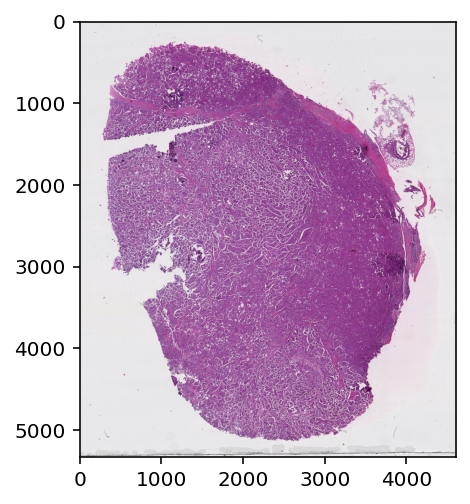

In [ ]:
img = plt.imread('data/No-Met-All/SUS143___2021_07_16_06.32.15')
plt.imshow(img)

In [ ]:
!rm data1.zip
!rm data2.zip

In [ ]:
#!rm -rf output

In [ ]:
# Duplicating Yes data to oversample

import os
import shutil
src_files = os.listdir("/content/data/Yes-All")
for file_name in src_files:
    full_file_name = os.path.join("/content/data/Yes-All", file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content/data/Yes-All-2")

In [ ]:
src_files = os.listdir("/content/data/Yes-All-2")
k = 0
for file_name in src_files:
  k = k + 1
  full_file_name = os.path.join("/content/data/Yes-All-2", file_name)
  #os. rename(full_file_name, full_file_name + str(k))
  shutil.move(full_file_name, "/content/data/Yes-All")

In [ ]:
!find data/No-Met-All -type f -exec mv '{}' '{}'.tiff \;
!find data/Yes-All -type f -exec mv '{}' '{}'.tiff \;

In [ ]:
!find /content/output/train/No-Met-All -type f -exec mv '{}' '{}'.tiff \;
!find /content/output/val/No-Met-All -type f -exec mv '{}' '{}'.tiff \;
!find /content/output/train/Yes-All -type f -exec mv '{}' '{}'.tiff \;
!find /content/output/val/Yes-All -type f -exec mv '{}' '{}'.tiff \;

In [ ]:
data_dir = './data/train/'
classes = os.listdir(data_dir)
print(classes)


In [ ]:
#check the number of the classes
print(len(classes))

In [ ]:
shutil.rmtree('/content/output')

In [ ]:
newpath = r'/content/output23' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('data', output="output", seed=1, ratio=(0.7,0.3))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 93 files [01:48,  1.16s/ files]


In [ ]:
full_file_name = os.path.join("/content/output/train/No-Met-All/SUS12 - 2021-07-15 18.37.38.tiff")
shutil.move(full_file_name, "/content/output/val/No-Met-All")

'/content/output/val/No-Met-All/SUS12 - 2021-07-15 18.37.38.tiff'

In [ ]:
#1st Run:
#No:134,53
#Yes:148,179

#2nd Run:
#No:11,12
#Yes:108,133

In [ ]:
print(len([name for name in os.listdir('./output/train/No-Met-All') if os.path.isfile(os.path.join('./output/train/No-Met-All', name))]))


48


In [ ]:
print(len([name for name in os.listdir('./output/val/No-Met-All') if os.path.isfile(os.path.join('./output/val/No-Met-All', name))]))


1


In [ ]:
print(len([name for name in os.listdir('./output/train/Yes-All') if os.path.isfile(os.path.join('./output/train/Yes-All', name))]))


41


In [ ]:
print(len([name for name in os.listdir('./output/val/Yes-All') if os.path.isfile(os.path.join('./output/val/Yes-All', name))]))


1


In [ ]:
#change the data_dir to output folder
data_dirs = ['./output/', './output2/', './output3/', './output4/', './output5/']
data_dir = data_dirs[0]
data_dir

'./output/'

In [ ]:
## Transfer Learning Model

In [ ]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = False

# Initially, going for fine tuning.

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=15, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = True

In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

In [ ]:
!rm -R /content/output/train/.ipynb_checkpoints
!rm -R /content/output/train/Yes-All/.ipynb_checkpoints
!rm -R /content/output/val/.ipynb_checkpoints
!rm -R /content/output/val/No-Met-All/.ipynb_checkpoints

rm: cannot remove '/content/output/val/No-Met-All/.ipynb_checkpoints': No such file or directory


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees = 180),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomInvert(p=0.5),
        transforms.RandomAdjustSharpness(1.75, p=0.5),
        transforms.RandomEqualize(p=0.5),
        transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter(),
                                                    transforms.Grayscale(3),
                                                    transforms.GaussianBlur(3, sigma=(0.1, 2.0))]), p=0.3),
        
        transforms.RandomAutocontrast(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [ ]:
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

In [ ]:
#Case-1, 12/01

criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=5, is_inception=False) 

Epoch 0/4
----------
train Loss: 0.5857 Acc: 0.7021
val Loss: 0.5449 Acc: 0.7600

Epoch 1/4
----------
train Loss: 0.5963 Acc: 0.6809
val Loss: 0.5558 Acc: 0.6800

Epoch 2/4
----------
train Loss: 0.5363 Acc: 0.8085
val Loss: 0.6185 Acc: 0.6800

Epoch 3/4
----------
train Loss: 0.4869 Acc: 0.7660
val Loss: 0.5844 Acc: 0.6400

Epoch 4/4
----------
train Loss: 0.6141 Acc: 0.6809
val Loss: 0.6178 Acc: 0.6400

Training complete in 2m 53s
Best val Acc: 0.760000


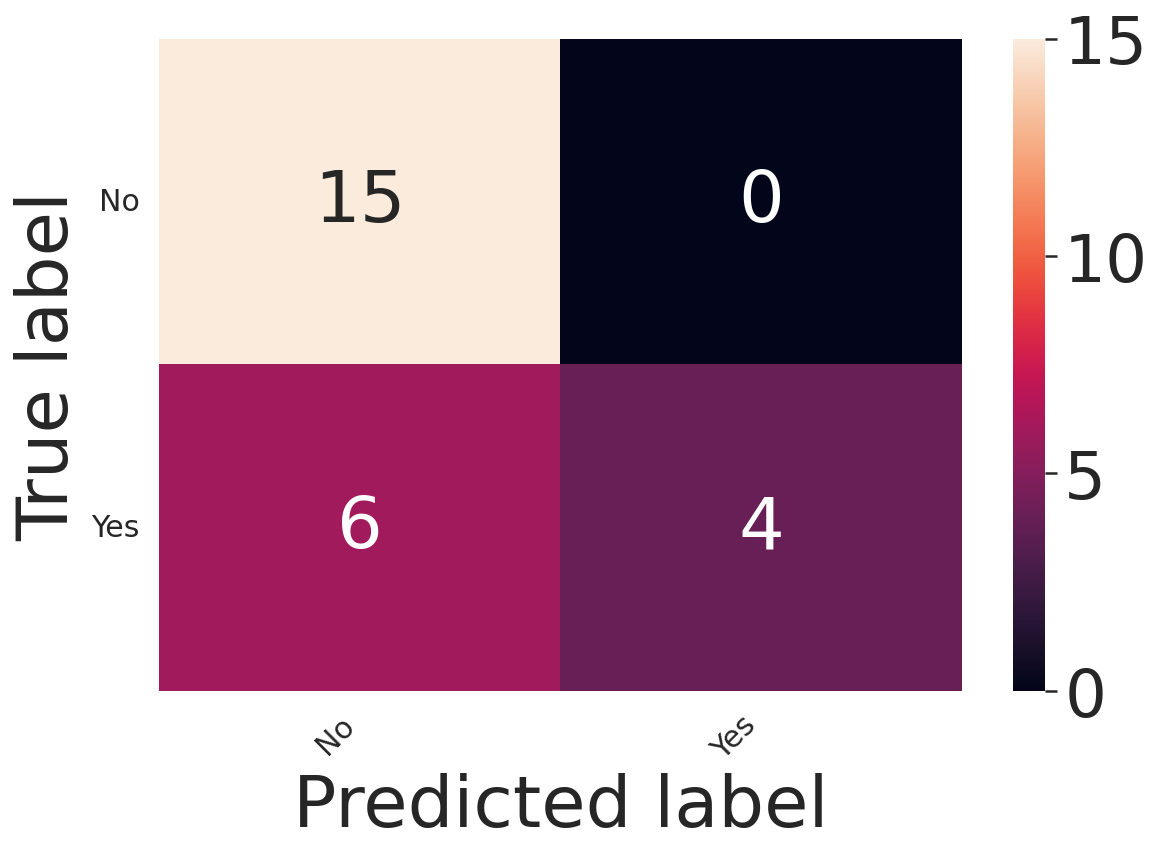

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

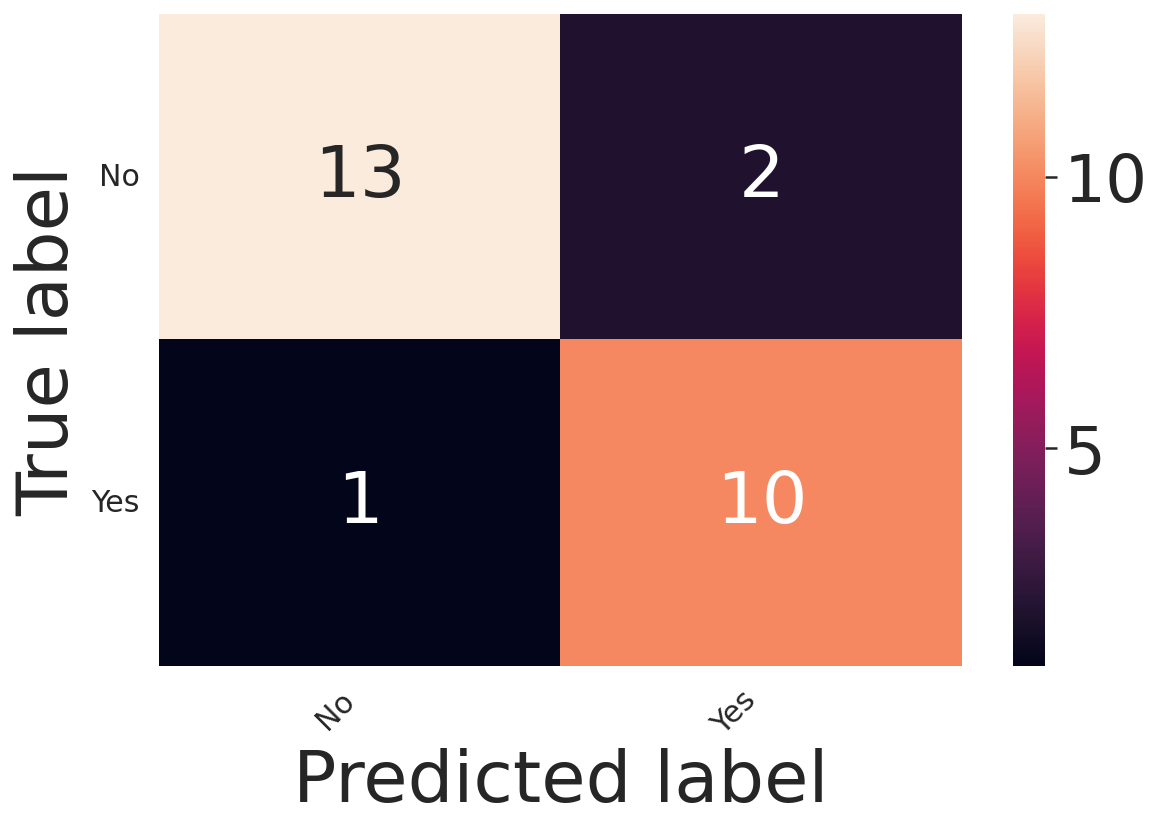

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

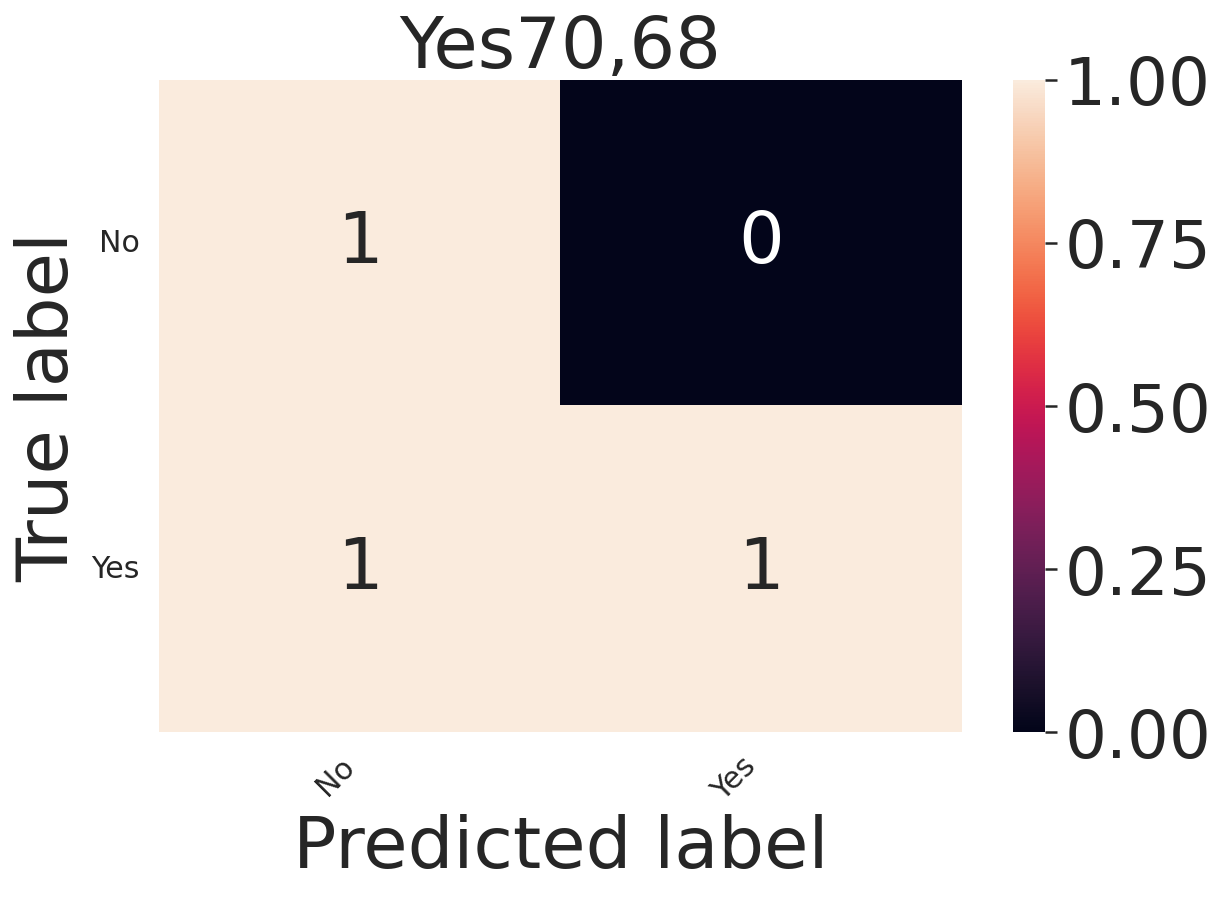

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.title("Yes70,68")
plt.ylabel('True label')
plt.xlabel('Predicted label');

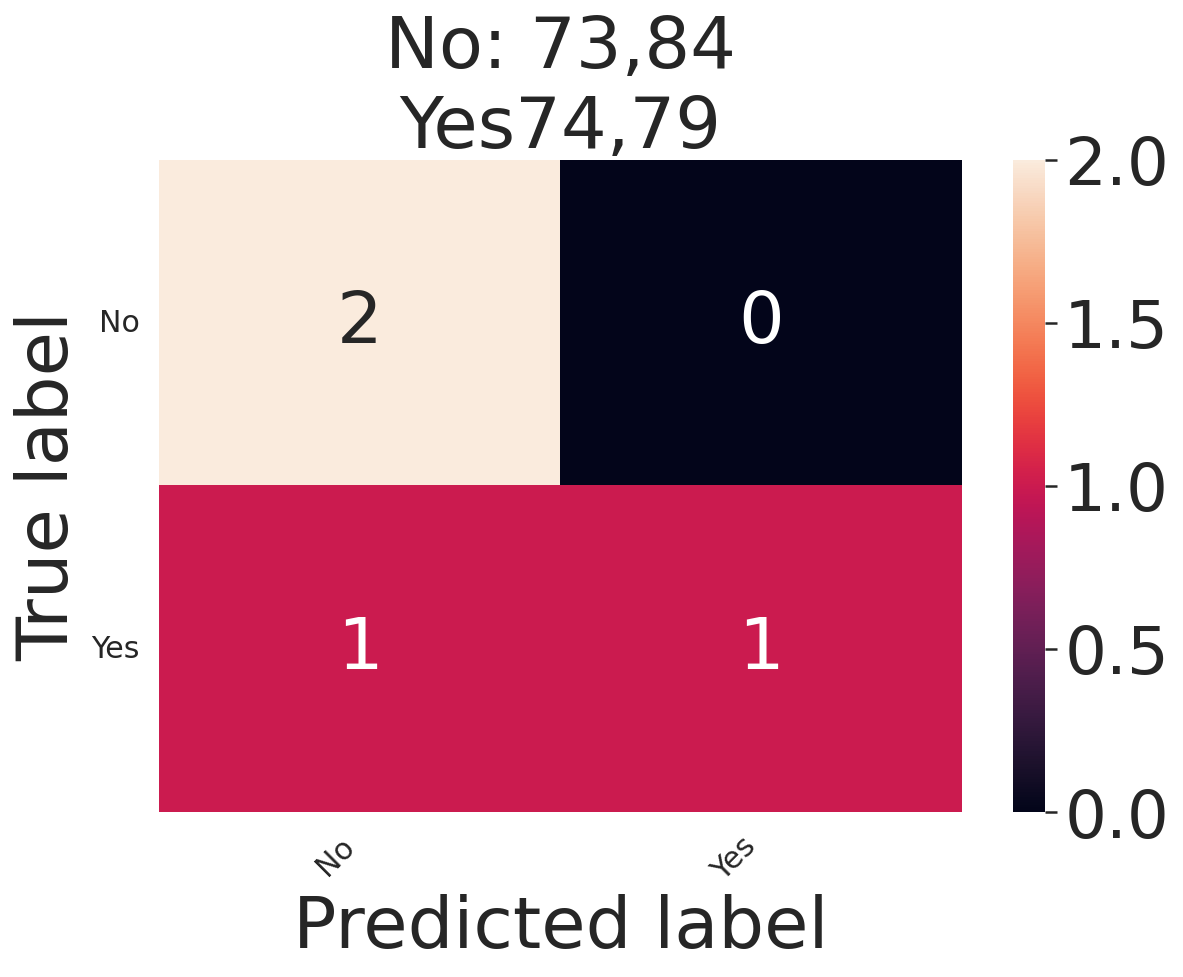

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.title("No: 73,84\nYes74,79")
plt.ylabel('True label')
plt.xlabel('Predicted label');

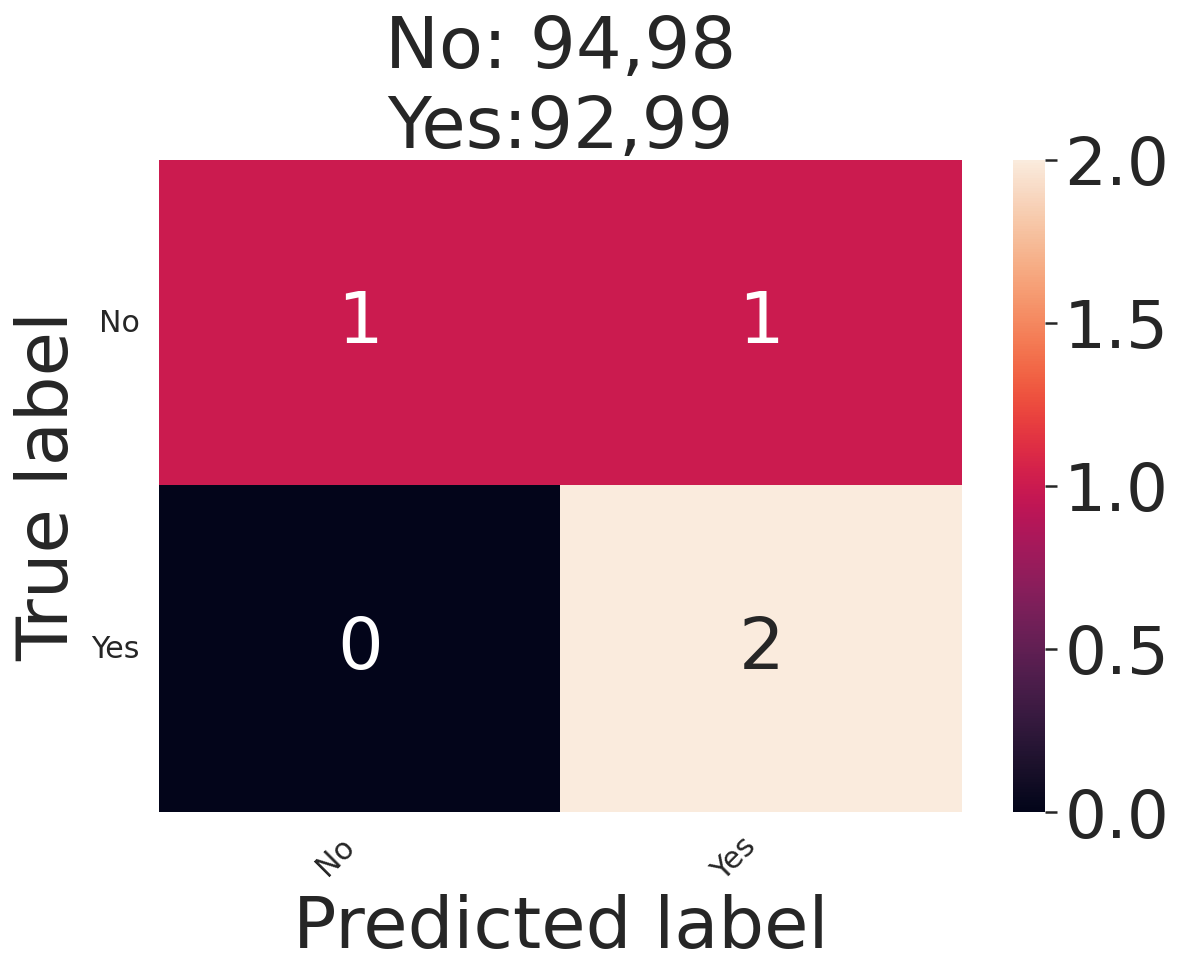

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.title("No: 94,98\nYes:92,99")
plt.ylabel('True label')
plt.xlabel('Predicted label');

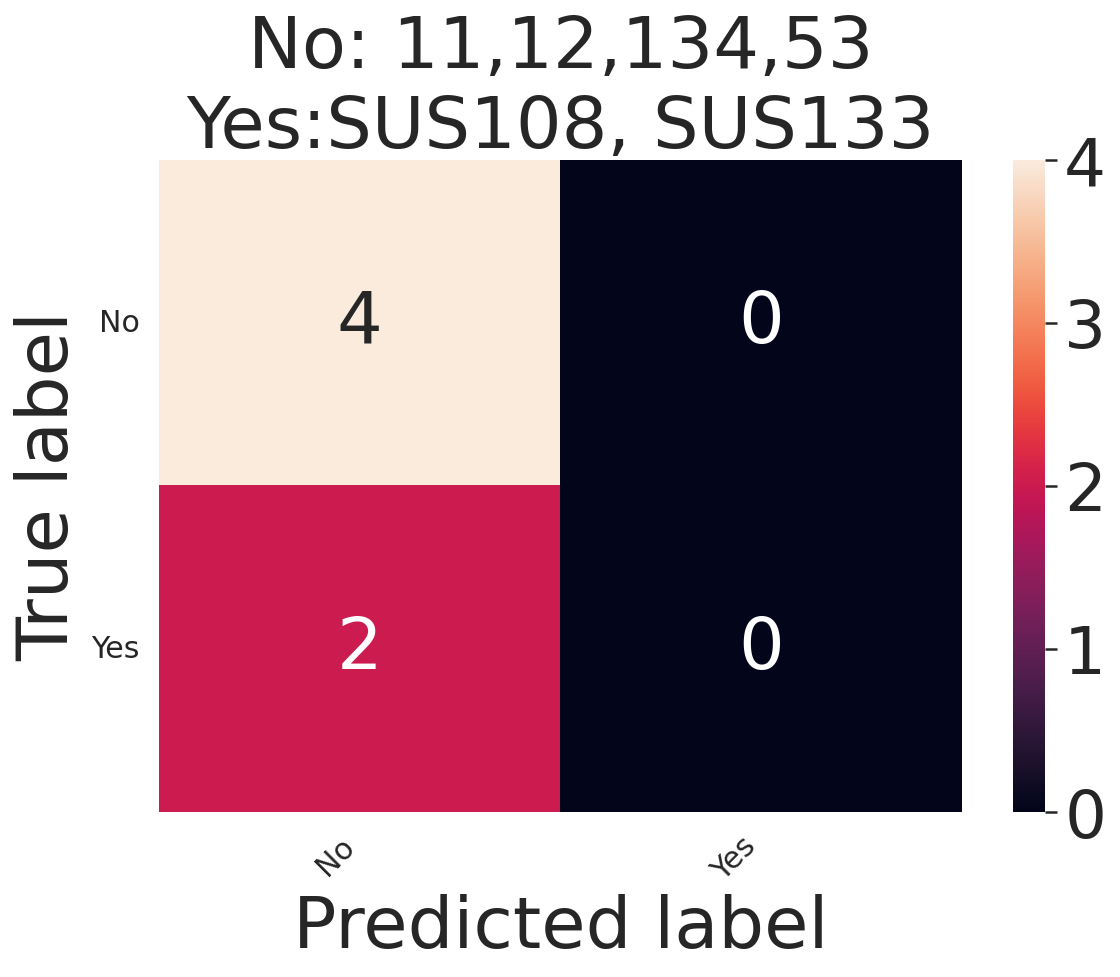

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.title("No: 11,12,134,53\nYes:SUS108, SUS133")
plt.ylabel('True label')
plt.xlabel('Predicted label');

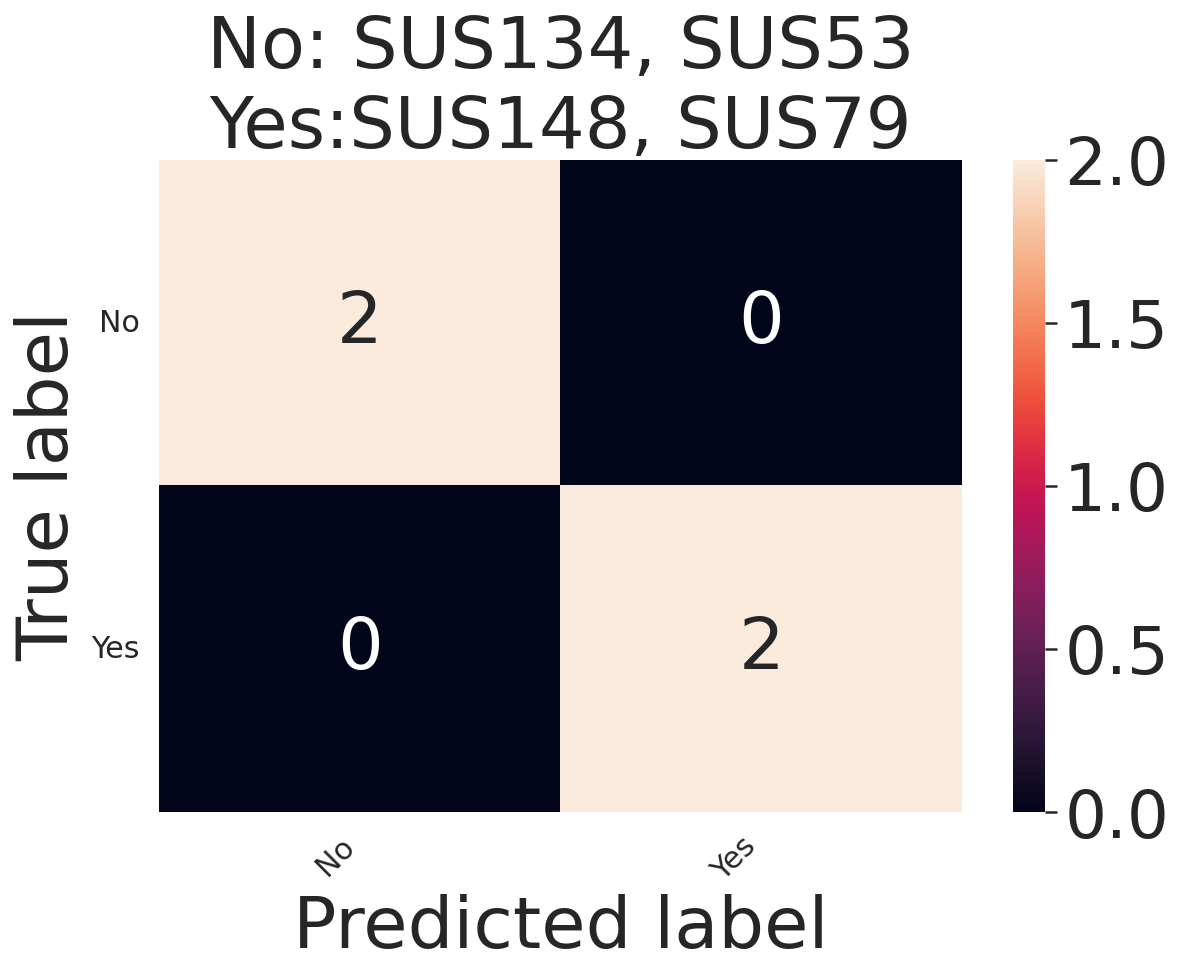

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sns.set(font_scale=3) # font size 2
plt.figure(figsize=(9, 6))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.title("No: SUS134, SUS53\nYes:SUS148, SUS79")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
#Case-5
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False) 

Epoch 0/14
----------
train Loss: 0.6368 Acc: 0.6042
val Loss: 0.6326 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.7082 Acc: 0.6875
val Loss: 0.6666 Acc: 0.6818

Epoch 2/14
----------
train Loss: 0.6389 Acc: 0.6667
val Loss: 0.6907 Acc: 0.5000

Epoch 3/14
----------
train Loss: 0.4700 Acc: 0.8125
val Loss: 0.8737 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.4682 Acc: 0.7500
val Loss: 0.8590 Acc: 0.6818

Epoch 5/14
----------
train Loss: 0.3307 Acc: 0.8750
val Loss: 0.7405 Acc: 0.6364

Epoch 6/14
----------
train Loss: 0.3339 Acc: 0.8958
val Loss: 0.8585 Acc: 0.6818

Epoch 7/14
----------
train Loss: 0.3086 Acc: 0.8750
val Loss: 0.8447 Acc: 0.6364

Epoch 8/14
----------
train Loss: 0.2369 Acc: 0.9167
val Loss: 0.7774 Acc: 0.6364

Epoch 9/14
----------
train Loss: 0.2355 Acc: 0.9583
val Loss: 0.8168 Acc: 0.5455

Epoch 10/14
----------
train Loss: 0.2994 Acc: 0.8333
val Loss: 0.9537 Acc: 0.6364

Epoch 11/14
----------
train Loss: 0.2763 Acc: 0.9167
val Loss: 0.9156 Acc: 0.6364

Ep

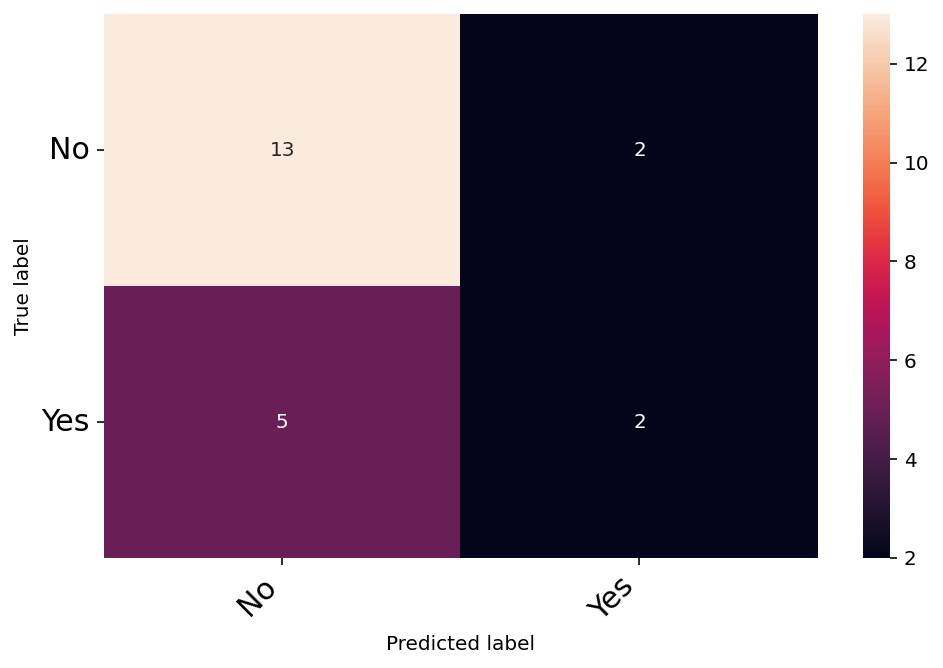

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(8,5))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
#Case-4
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False) 

Epoch 0/14
----------
train Loss: 0.7690 Acc: 0.5625
val Loss: 0.7501 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.6433 Acc: 0.7083
val Loss: 0.5917 Acc: 0.7273

Epoch 2/14
----------
train Loss: 0.5563 Acc: 0.7500
val Loss: 0.5948 Acc: 0.6818

Epoch 3/14
----------
train Loss: 0.5595 Acc: 0.7083
val Loss: 0.6056 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.5330 Acc: 0.6667
val Loss: 0.7057 Acc: 0.5455

Epoch 5/14
----------
train Loss: 0.5116 Acc: 0.7500
val Loss: 0.7154 Acc: 0.6364

Epoch 6/14
----------
train Loss: 0.4215 Acc: 0.7917
val Loss: 0.6822 Acc: 0.5909

Epoch 7/14
----------
train Loss: 0.3702 Acc: 0.8750
val Loss: 0.6768 Acc: 0.5455

Epoch 8/14
----------
train Loss: 0.3114 Acc: 0.8542
val Loss: 0.7532 Acc: 0.6818

Epoch 9/14
----------
train Loss: 0.2889 Acc: 0.8958
val Loss: 0.7491 Acc: 0.5909

Epoch 10/14
----------
train Loss: 0.2854 Acc: 0.9167
val Loss: 0.7172 Acc: 0.5455

Epoch 11/14
----------
train Loss: 0.2747 Acc: 0.8750
val Loss: 0.6943 Acc: 0.7273

Ep

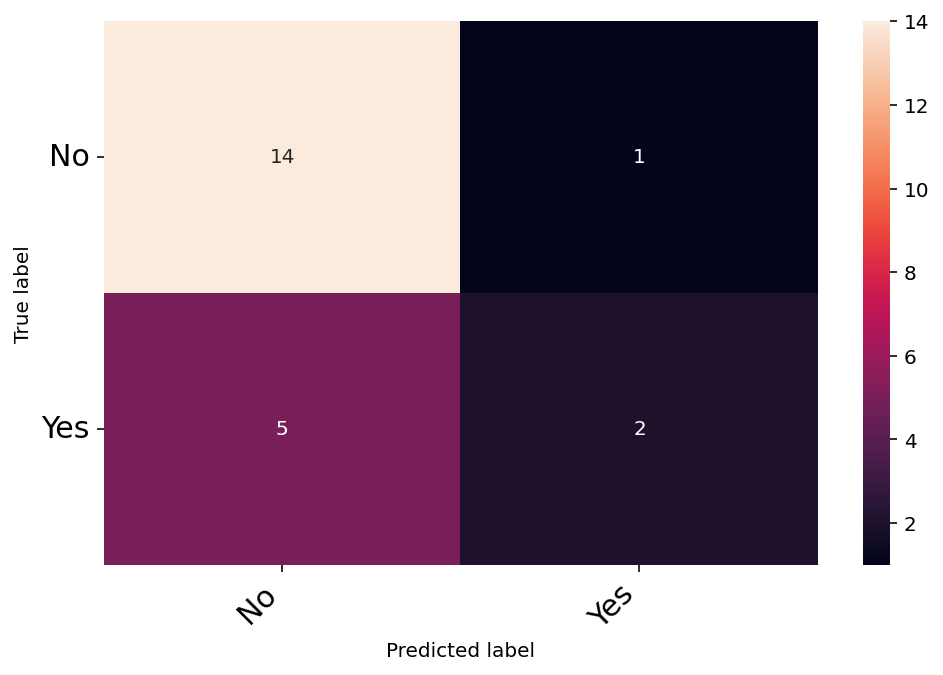

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(8,5))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
#Case-3
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False) 

Epoch 0/14
----------
train Loss: 0.6650 Acc: 0.6875
val Loss: 0.6744 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.6208 Acc: 0.6458
val Loss: 0.6279 Acc: 0.6818

Epoch 2/14
----------
train Loss: 0.5537 Acc: 0.7083
val Loss: 0.6190 Acc: 0.6818

Epoch 3/14
----------
train Loss: 0.5230 Acc: 0.7708
val Loss: 0.6198 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.5488 Acc: 0.7917
val Loss: 0.6189 Acc: 0.6818

Epoch 5/14
----------
train Loss: 0.4207 Acc: 0.8125
val Loss: 0.5949 Acc: 0.6818

Epoch 6/14
----------
train Loss: 0.4662 Acc: 0.7500
val Loss: 0.6083 Acc: 0.6818

Epoch 7/14
----------
train Loss: 0.3934 Acc: 0.8542
val Loss: 0.5741 Acc: 0.7727

Epoch 8/14
----------
train Loss: 0.3431 Acc: 0.8333
val Loss: 0.5808 Acc: 0.7273

Epoch 9/14
----------
train Loss: 0.3692 Acc: 0.8542
val Loss: 0.5774 Acc: 0.7727

Epoch 10/14
----------
train Loss: 0.2376 Acc: 0.9583
val Loss: 0.6119 Acc: 0.7273

Epoch 11/14
----------
train Loss: 0.2830 Acc: 0.8542
val Loss: 0.6694 Acc: 0.6818

Ep

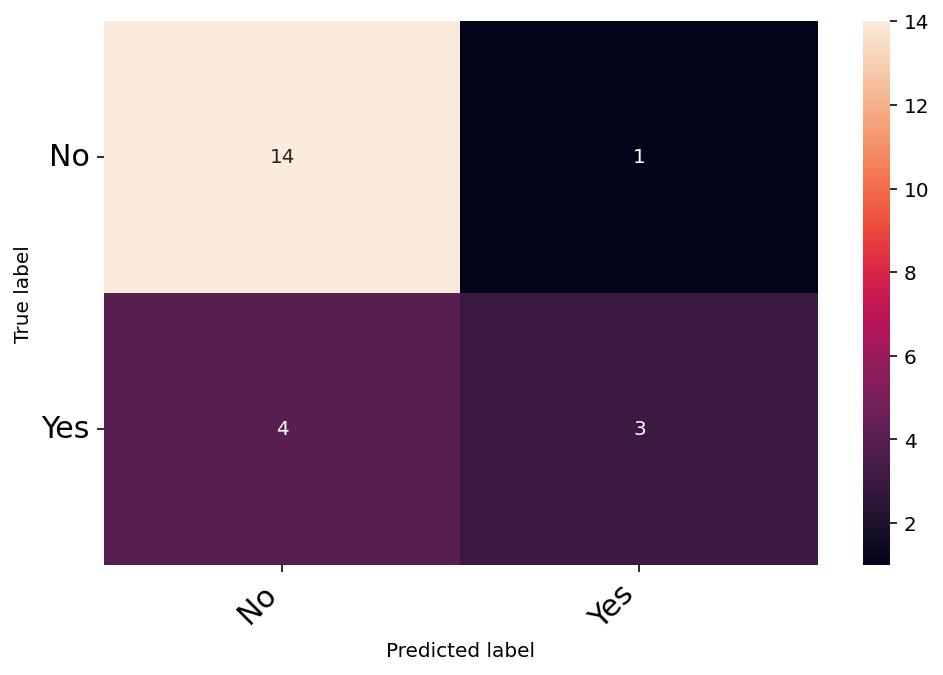

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(8,5))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
#Case-2
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False) 

Epoch 0/14
----------
train Loss: 0.6222 Acc: 0.6667
val Loss: 0.7543 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.6940 Acc: 0.7083
val Loss: 0.8209 Acc: 0.6818

Epoch 2/14
----------
train Loss: 0.4853 Acc: 0.7708
val Loss: 0.7657 Acc: 0.4545

Epoch 3/14
----------
train Loss: 0.4834 Acc: 0.7500
val Loss: 0.9704 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.3693 Acc: 0.8333
val Loss: 0.9699 Acc: 0.6818

Epoch 5/14
----------
train Loss: 0.3846 Acc: 0.7917
val Loss: 0.9706 Acc: 0.5909

Epoch 6/14
----------
train Loss: 0.2570 Acc: 0.8750
val Loss: 1.0144 Acc: 0.6364

Epoch 7/14
----------
train Loss: 0.3036 Acc: 0.8542
val Loss: 1.0683 Acc: 0.6364

Epoch 8/14
----------
train Loss: 0.2372 Acc: 0.8958
val Loss: 1.0590 Acc: 0.5000

Epoch 9/14
----------
train Loss: 0.1711 Acc: 0.9375
val Loss: 1.2433 Acc: 0.6364

Epoch 10/14
----------
train Loss: 0.3479 Acc: 0.8125
val Loss: 1.1898 Acc: 0.6364

Epoch 11/14
----------
train Loss: 0.2049 Acc: 0.8958
val Loss: 1.2275 Acc: 0.5909

Ep

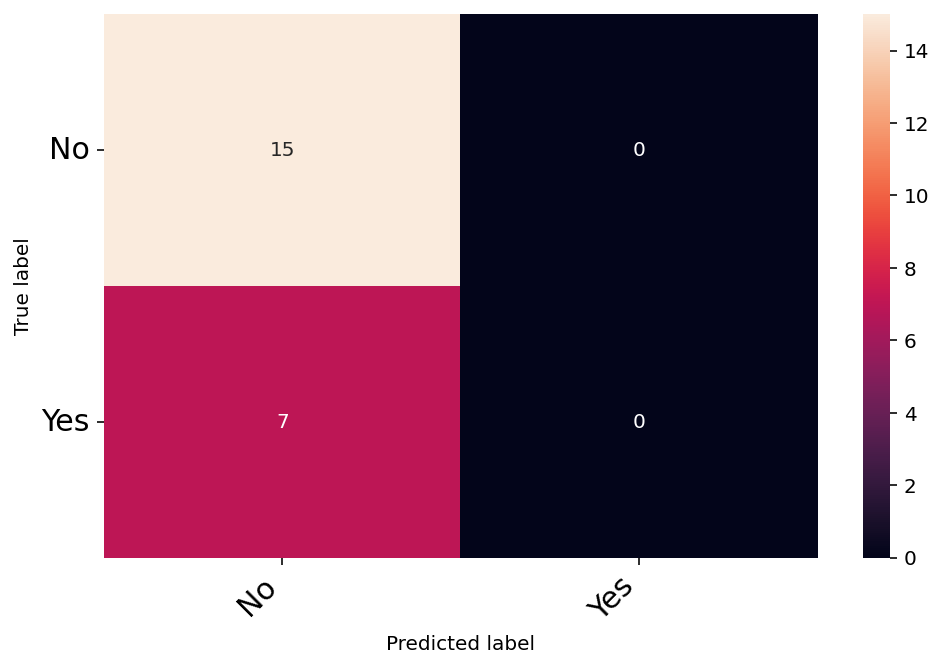

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(8,5))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
# Case-1
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=False) 

Epoch 0/14
----------
train Loss: 0.6355 Acc: 0.6875
val Loss: 0.5990 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.6218 Acc: 0.7083
val Loss: 0.5576 Acc: 0.7273

Epoch 2/14
----------
train Loss: 0.5668 Acc: 0.7083
val Loss: 0.5612 Acc: 0.6818

Epoch 3/14
----------
train Loss: 0.5107 Acc: 0.7708
val Loss: 0.5851 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.4842 Acc: 0.7708
val Loss: 0.5855 Acc: 0.6818

Epoch 5/14
----------
train Loss: 0.3837 Acc: 0.8333
val Loss: 0.6389 Acc: 0.6818

Epoch 6/14
----------
train Loss: 0.4176 Acc: 0.8333
val Loss: 0.6441 Acc: 0.6364

Epoch 7/14
----------
train Loss: 0.4051 Acc: 0.8125
val Loss: 0.6344 Acc: 0.6818

Epoch 8/14
----------
train Loss: 0.3598 Acc: 0.8958
val Loss: 0.7846 Acc: 0.6818

Epoch 9/14
----------
train Loss: 0.4691 Acc: 0.7708
val Loss: 0.6409 Acc: 0.7273

Epoch 10/14
----------
train Loss: 0.4632 Acc: 0.8125
val Loss: 0.5800 Acc: 0.6818

Epoch 11/14
----------
train Loss: 0.2452 Acc: 0.8750
val Loss: 0.8461 Acc: 0.6818

Ep

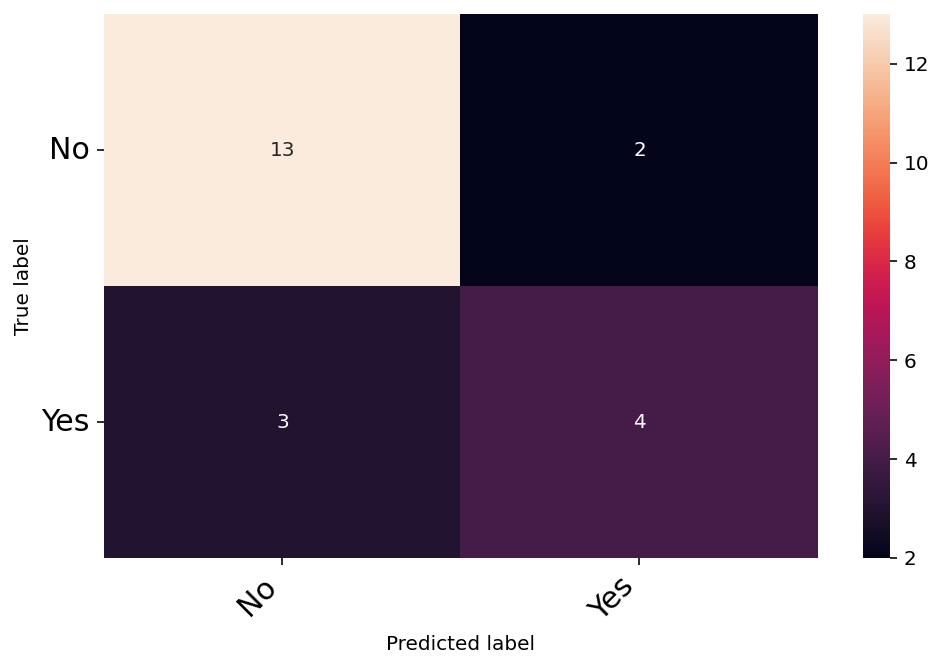

In [ ]:
nb_classes = 2
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(8,5))

class_names = ['No', 'Yes']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
confusion_matrix = torch.zeros(2, 2)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders_dict['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[13.,  2.],
        [ 3.,  4.]])


Epoch 0/14
----------


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


train Loss: 0.6847 Acc: 0.7083
val Loss: 0.6671 Acc: 0.6818

Epoch 1/14
----------
train Loss: 0.8004 Acc: 0.3542
val Loss: 0.6626 Acc: 0.6818

Epoch 2/14
----------
train Loss: 0.7971 Acc: 0.7083
val Loss: 0.7234 Acc: 0.6818

Epoch 3/14
----------
train Loss: 0.7481 Acc: 0.6458
val Loss: 0.6559 Acc: 0.6818

Epoch 4/14
----------
train Loss: 0.6586 Acc: 0.6458
val Loss: 0.6156 Acc: 0.6818

Epoch 5/14
----------
train Loss: 0.5927 Acc: 0.7083
val Loss: 0.6500 Acc: 0.6364

Epoch 6/14
----------
train Loss: 0.5779 Acc: 0.7083
val Loss: 0.6452 Acc: 0.6818

Epoch 7/14
----------
train Loss: 0.5814 Acc: 0.7083
val Loss: 0.6333 Acc: 0.6818

Epoch 8/14
----------
train Loss: 0.5681 Acc: 0.6875
val Loss: 0.6587 Acc: 0.6818

Epoch 9/14
----------
train Loss: 0.5733 Acc: 0.7292
val Loss: 0.7174 Acc: 0.6818

Epoch 10/14
----------
train Loss: 0.5569 Acc: 0.7292
val Loss: 0.6590 Acc: 0.5455

Epoch 11/14
----------
train Loss: 0.5825 Acc: 0.7083
val Loss: 0.7205 Acc: 0.5000

Epoch 12/14
----------
t

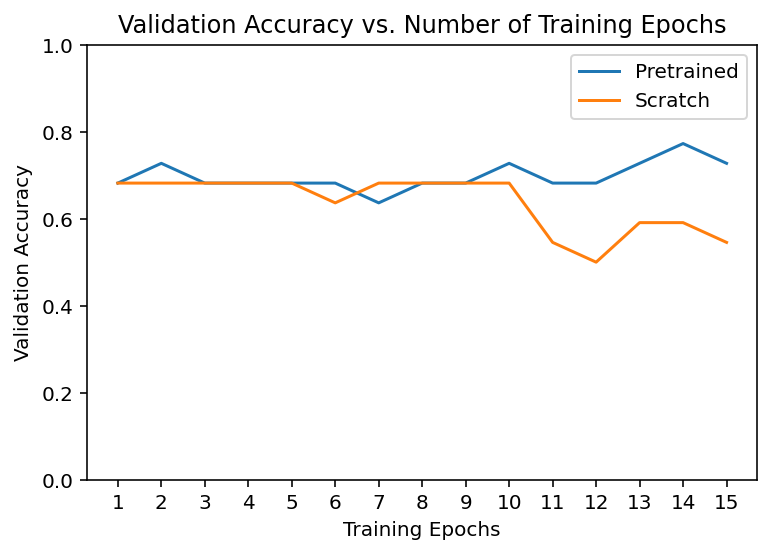

In [ ]:
# Initialize the non-pretrained version of the model used for this run
scratch_model,_ = initialize_model(model_name, num_classes, feature_extract=False, use_pretrained=False)
scratch_model = scratch_model.to(device)
scratch_optimizer = optim.SGD(scratch_model.parameters(), lr=0.001, momentum=0.9)
scratch_criterion = nn.CrossEntropyLoss()
_,scratch_hist = train_model(scratch_model, dataloaders_dict, scratch_criterion, scratch_optimizer, num_epochs=num_epochs, is_inception=(model_name=="inception"))

# Plot the training curves of validation accuracy vs. number
#  of training epochs for the transfer learning method and
#  the model trained from scratch
ohist = []
shist = []

ohist = [h.cpu().numpy() for h in hist]
shist = [h.cpu().numpy() for h in scratch_hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.plot(range(1,num_epochs+1),shist,label="Scratch")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()